In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.core.display import display, HTML

from datetime import datetime

In [2]:
df = pd.read_csv('./waterquality.csv')

In [3]:
df.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2366 non-null   object 
 1   Salinity (ppt)          2241 non-null   float64
 2   DissolvedOxygen (mg/L)  1520 non-null   float64
 3   pH                      2276 non-null   float64
 4   SecchiDepth (m)         2298 non-null   float64
 5   WaterDepth (m)          2300 non-null   float64
 6   WaterTemp (C)           2250 non-null   float64
 7   AirTemp (C)             2371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 148.3+ KB


In [5]:
df.describe()

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
count,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,2371.000000
mean,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,15.663050
std,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,10.314720
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,-17.777778
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,8.888889
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,16.666667
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,23.888889
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,33.500000


In [6]:
df.shape

(2371, 8)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
for i in df.columns[1:]:
    df[i] = df[i].fillna(df[i].median())

In [9]:
fig = px.line(df, x=df.columns[0], y=df.columns[1:][0])
fig.show()
for i in range(0, len(df.columns[2:]), 2):
    fig = px.line(df, x=df.columns[0], y=df.columns[2:][i:i+2])
    fig.show()

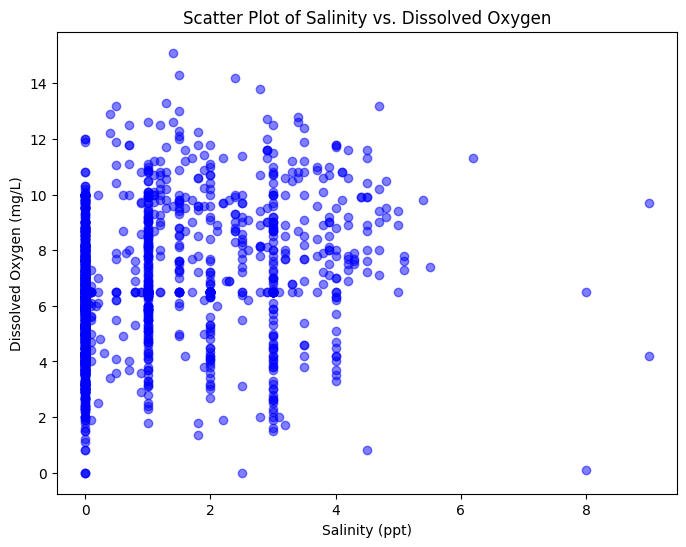

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Salinity (ppt)'], df['DissolvedOxygen (mg/L)'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Salinity vs. Dissolved Oxygen')
plt.xlabel('Salinity (ppt)')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.show()

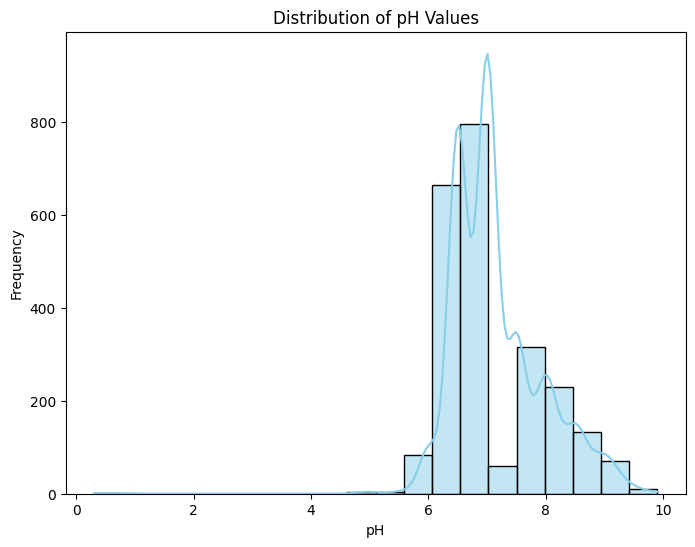

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['pH'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of pH Values')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

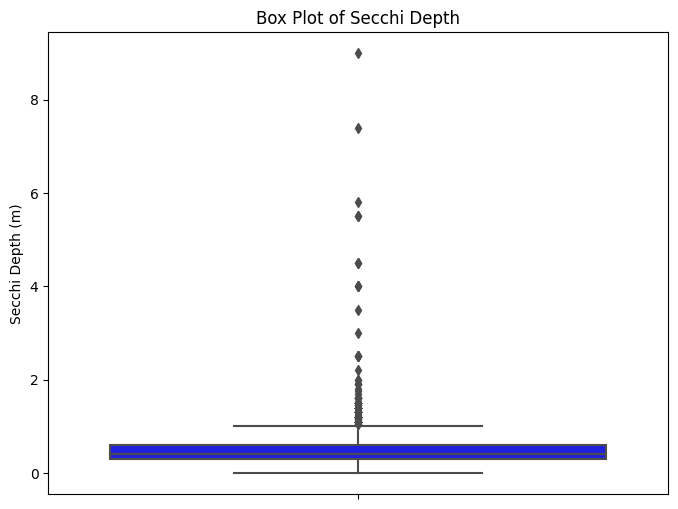

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['SecchiDepth (m)'], color='blue')
plt.title('Box Plot of Secchi Depth')
plt.ylabel('Secchi Depth (m)')
plt.show()

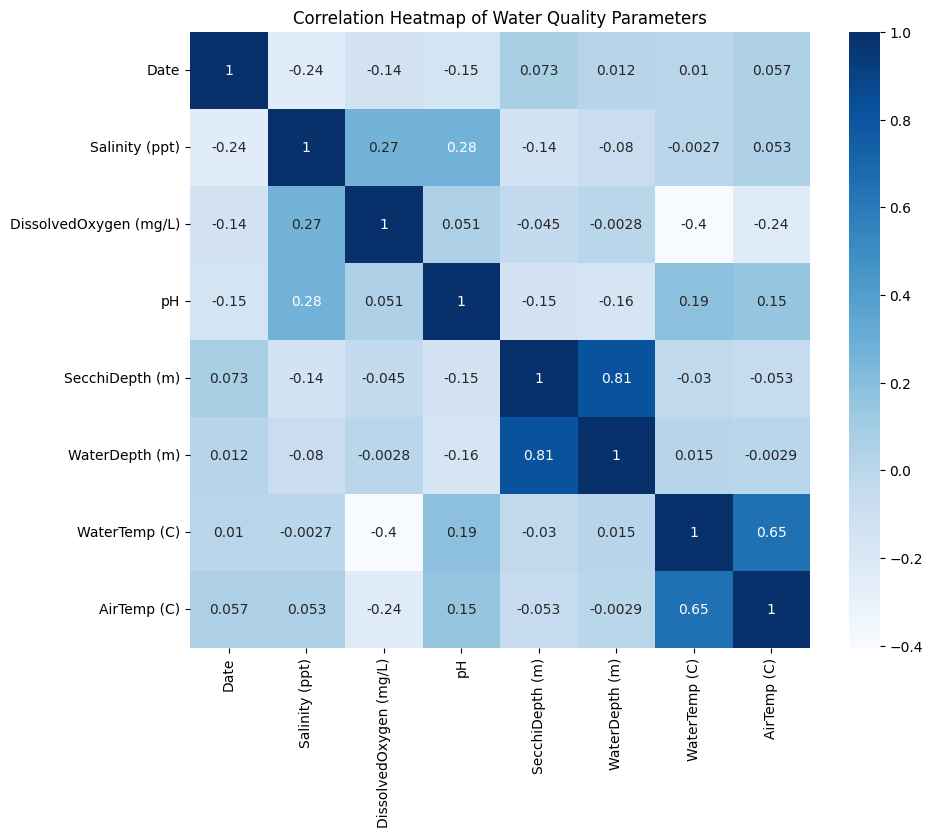

In [13]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()

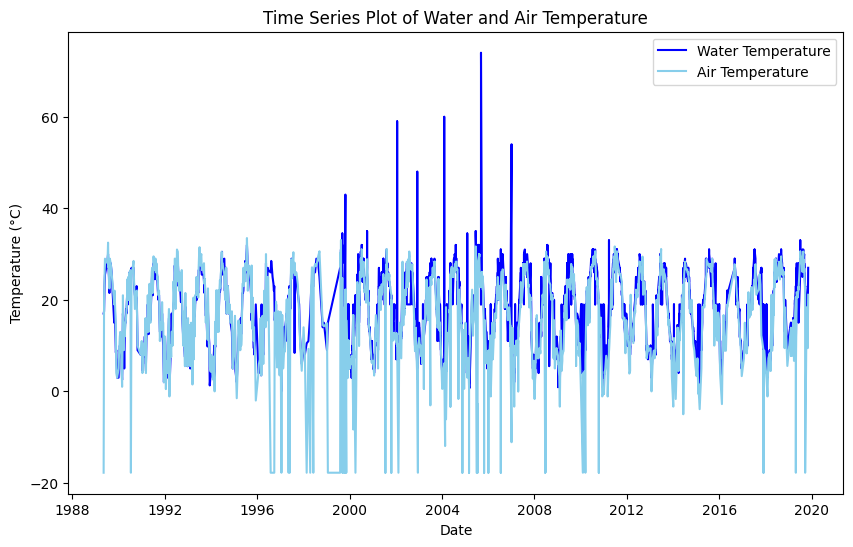

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['WaterTemp (C)'], color='blue', label='Water Temperature')
plt.plot(df['Date'], df['AirTemp (C)'], color='skyblue', label='Air Temperature')
plt.title('Time Series Plot of Water and Air Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

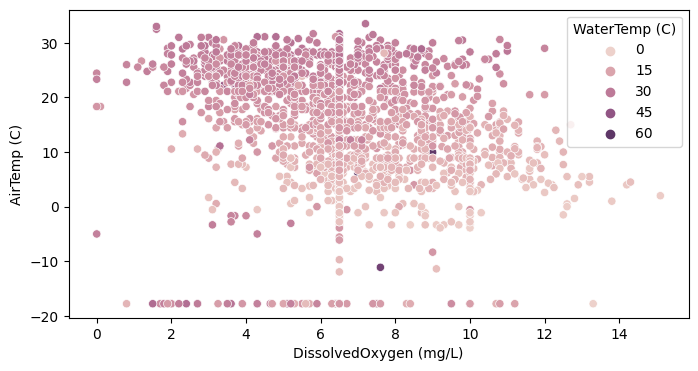

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='DissolvedOxygen (mg/L)', y='AirTemp (C)',hue='WaterTemp (C)');

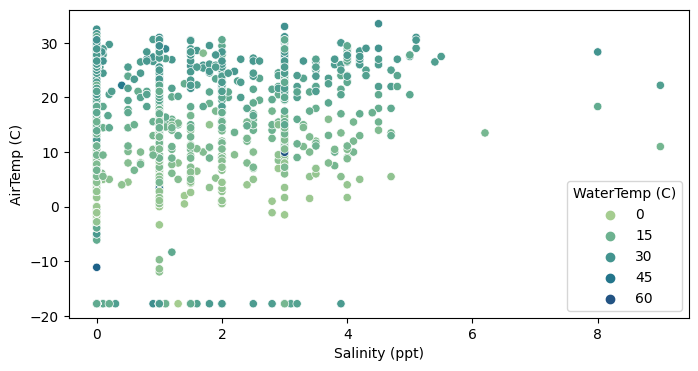

In [16]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Salinity (ppt)', y='AirTemp (C)',hue='WaterTemp (C)', palette=sns.color_palette("crest", as_cmap=True));

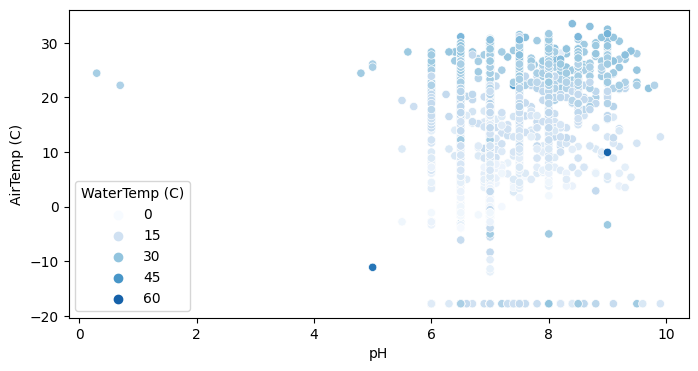

In [17]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='pH', y='AirTemp (C)',hue='WaterTemp (C)', palette=sns.color_palette("Blues", as_cmap=True));

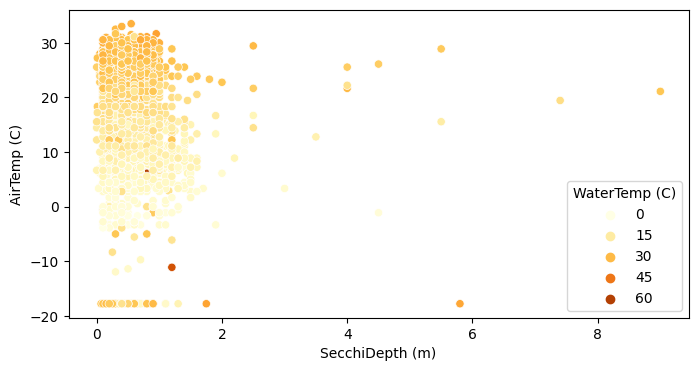

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='SecchiDepth (m)', y='AirTemp (C)',hue='WaterTemp (C)', palette=sns.color_palette("YlOrBr", as_cmap=True));

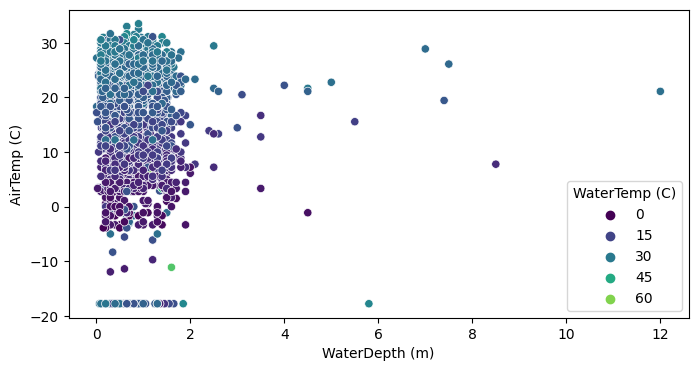

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='WaterDepth (m)', y='AirTemp (C)',hue='WaterTemp (C)', palette=sns.color_palette("viridis", as_cmap=True));

## Conclusion:

In conclusion, the water quality dataset serves as a valuable resource for monitoring and analyzing environmental health and aquatic habitat conditions at the Refuge. Through meticulous data collection and advanced analysis techniques, the dataset provides insights essential for informed decision-making, environmental management, and the preservation of natural ecosystems. Continued efforts in data collection, analysis, and interpretation will further enhance our understanding of water quality dynamics, contributing to the sustainable management of water resources and biodiversity conservation efforts.